# <center>Neural Networks</center>
### <center>Calvin Chi</center>

# 1. Introduction
Neural network is a supervised machine learning algorithm that is used for regression, and more commonly, for classification tasks. The basic building block of a full-connected neural network is the perceptron.

![pic1](http://i.imgur.com/yZfR8RH.png)

In this representation, $x_{1},...,x_{3}$ are the input values for features $1$ to $3$, and $+1$ is the bias term to increase the model space. The neuron then accepts these input to output $h_{w}(x) = f(w^{\top}x) = f(\sum_{i=1}^{3}w_{i}x_{i} + w_{4})$, where $w \in \mathbb{R}^{4}$. The activation function $f(\cdot)$ is an non-linear function, and popular ones include ReLU, sigmoid, or the tanh function. 

A neural network is built from these individual neurons. An example of a neural network with $3$ layers looks like this:

![pic2](http://i.imgur.com/W8jxjyy.png)

With this architecture, our weight vector becomes a matrix instead. To go from layer $L_{1}$ to layer $L_{2}$, we would need a $W^{(1)} \in \mathbb{R}^{3 \times 4}$ matrix, where $4$ is the number of input values $n_{in}$ and $3$ is the number of output values $n_{out}$. The neurons in the second layer are denoted as $a^{(2)}_{j}$, where $j$ denotes the $j\text{th}$ neuron. Let $x \in \mathbb{R}^{4}$ be constructed as

$$x = \begin{bmatrix}x_1\\x_2\\x_3\\1\\\end{bmatrix}$$

According to diagram above, computing $a^{(2)} \in \mathbb{R}^{3}$ is performed by

$$a^{(2)} = f(z^{(2)}) = f(W^{(1)}x)$$

where $W \in \mathbb{R}^{3 \times 4}$ and $x \in \mathbb{R}^{4}$. A neural network with more than $3$ layers is called a deep neural network. The rest of this notebook will focus more on the derivation of weight update equations and implementation, rather than theoretical properties.

# 2. Backpropagation
Training a neural network involves repetitions of the below two steps until convergence

1. Forward propagation: given an input training sample $x \in \mathbb{R}^{p}$, compute $a^{(1)}, \dots ,a^{(L - 1)}, h_{W}(x)$ for $L$ layers, as described above.
2. Backpropagation: starting from some loss function, compute gradients with respect to each set of weights.

After backpropagation, gradient descent is used to update each set of weights. In this notebook, we will implement a simple 3-layer neural network for MNIST digit classification, which given an image of handwritten digits, predicts the number as one of $\{0, 1, \dots ,9\}$. Backpropagation updates will be made via stochastic gradient descent, which completes each iteration of forward propagation and backpropagation using one sample. The middle layer will use the tanh activation function whereas the last output layer will use the sigmoid activation function. We shall derive backpropagation weight updates for different loss functions. It is instructive to first define the activation functions used and provide their respective derivatives. The sigmoid function is defined as

$$g(z) = \frac{1}{1+e^{-z}}$$

with derivative

$$\frac{dg(z)}{dz} = \frac{e^{-z}}{(1 + e^{-z})^{2}} = \frac{1 + e^{-z}}{(1 + e^{-z})^{2}} - \frac{1}{(1 + e^{-z})^{2}} = \frac{1}{1 + e^{-z}}\left(1 - \frac{1}{(1 + e^{-z})}\right) = g(z)(1-g(z))$$

The tanh activation function is defined as

$$f(z) = tanh(z)$$

with derivative

$$\frac{df(z)}{dz} = 1 - tanh^{2}(z)$$


## 2.1 Mean Squared Error
Let $k$ denote the number of outputs of the neural network, $y_{j}$ be the $j$th output, and input sample be $x \in \mathbb{R}^{p}$. The mean squared error is defined as the sum of squared errors across the $k$ classes

$$\mathcal{L} = \frac{1}{2}\sum_{j=1}^{k}(y_{j} - g(z_{j}^{(3)}))^{2} = \frac{1}{2}(y - g(z^{(3)}))^{\top}(y - g(z^{(3)}))$$

Taking care that the dimensions work out, the gradient for $W^{(2)} \in \mathbb{R}^{k \times n_{2}}$ would be

\begin{align*}
\nabla_{W^{(2)}}\mathcal{L} &= \nabla_{g(z^{(3)})}\mathcal{L} \cdot \nabla_{z^{(3)}}g(z^{(3)}) \cdot \nabla_{W^{(2)}}z^{(3)}\\
&= -D^{(3)}(y - g(z^{(3)}))(a^{(2)})^{\top}
\end{align*}

where $D^{(3)} = diag(g(z^{(3)})(1 - g(z^{(3)}))) \in \mathbb{R}^{k \times k}$. The gradient for $W^{(1)} \in \mathbb{R}^{n_{2} \times p}$ is 

\begin{align*}
\nabla_{W^{(1)}}\mathcal{L} &= \nabla_{g(z^{(3)})}\mathcal{L} \cdot \nabla_{z^{(3)}}g(z^{(3)}) \cdot \nabla_{a^{(2)}}z^{(3)} \cdot \nabla_{z^{(2)}}a^{(2)} \cdot \nabla_{W^{(1)}}z^{(2)}\\
&= -D^{(2)}(W^{(2)})^{\top}D^{(3)}(y - g(z^{(3)}))x^{\top}
\end{align*}

where $a^{(2)} = f(z^{(2)})$, $D^{(2)} = diag(1-tanh^{2}(z^{(2)})) \in \mathbb{R}^{n_{2} \times n_{2}}$. With the gradients, we update the weights with learning rate $\alpha$ as

$$W^{(2)} := W^{(2)} - \alpha \nabla_{W^{(2)}}\mathcal{L}$$

$$W^{(1)} := W^{(1)} - \alpha \nabla_{W^{(1)}}\mathcal{L}$$

## 2.2 Cross Entropy Error
The cross entropy error is defined as

$$\mathcal{L} = -\sum_{j=1}^{k}\left(y_{j} \ln(g(z_{j}^{(3)})) + (1 - y_{j}) \ln(1 - g(z_{j}^{(3)}))\right)$$

Following the same chain rule for the mean squaured error, we get the following gradient for $W^{(2)}$.

\begin{align*}
\nabla_{W^{(2)}}\mathcal{L} &= D^{(3)}\left(\frac{1 - y}{1 - g(z^{(3)})} - \frac{y}{g(z^{(3)})}\right)(a^{(2)})^{\top}
\end{align*}

The gradient for $W^{(1)}$ would be

\begin{align*}
\nabla_{W^{(1)}}\mathcal{L} &= D^{(2)}(W^{(2)})^{\top}D^{(3)}\left(\frac{1 - y}{1 - g(z^{(3)})} - \frac{y}{g(z^{(3)})}\right)x^{\top}
\end{align*}

The update procedure is the same as described for the mean squared error case.

# 3. Implementation
Our implementation shall have the following features:

+ Learning rate of $\alpha = \frac{1}{100 + 10k}$, where $k$ = number of epochs.
+ Weight initialization: each weight value is drawn randomly from a $N(0, \sigma=0.01)$ distribution. 

We will be training our neural network for MNIST digit classificaiton. Given each image in MNIST is $28 \times 28$, the input size is 784 after vectorizing the images. The hidden layer will have 256 neurons, and the output layer has 10 neurons for each digit. The usage of our `NeuralNetwork` class will be as follows:

```
classifier = NeuralNetwork(layers, loss="mean_square", monitor=True, plot=True)
```

+ layers: a list of integers, one for each layer, each representing number of neurons. In a 3-layer neural network, this will be a list of 3 integers.
+ loss: string of either "mean_square" for mean square loss or "cross_entropy" for cross entropy loss.
+ monitor: whether to print to screen the current training loss and accuracy periodically, and optionally print the current validation loss and accuracy if validation dataset is provided with the $\texttt{train}()$ function.
+ plot: whether to plot training error vs iterations and training accuracy vs iterations at the conclusion of the training process. 

The usage for training the neural network is as follows:

```
classifier.train(x, Y, epochs, validation=None, validation_label=None)
```

+ X: training data in a numpy array with dimensions $\mathbb{R}^{n \times p}$
+ Y: training labels in a numpy array of size $\mathbb{R}^{n \times d}$
+ epochs: number of complete passes through the training data
+ validation: validation data in a numpy array, with same dimensions as X
+ validation_label: validation label in a numpy array, with same dimensions as Y.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sys
 
class NeuralNetwork: 
    def tanh(self, x): 
        return np.tanh(x)
    
    def tanh_deriv(self, x): 
        return 1.0 - (x)**2

    def logistic(self, x):
        return 1 / (1 + np.exp(-x))

    def logistic_deriv(self, x): 
        return x * (1 - x)

    def mean_square(self, Y, Yhat): 
        return 0.5 * np.sum((Y - Yhat)**2)
    
    def mean_square_deriv(self, y, yhat):
        return - (y - yhat)

    def cross_entropy(self, Y, Yhat):
        return - np.sum(np.multiply(Y, np.log(Yhat)) + np.multiply((1 - Y), np.log(1 - Yhat)))

    def cross_entropy_deriv(self, y, yhat):
        return (1 - y) / (1 - yhat) - (y / yhat)
    
    def accuracy(self, Y, Yhat):
        Y = np.argmax(Y, axis = 1).flatten()
        Yhat = np.argmax(Yhat, axis = 1).flatten()
        return np.mean(Y == Yhat)
    
    def learning_rate(self, k):
        return 1 / float(100 + 10 * k)
    
    def track_progress(self, n_iterations, X, Y, validation = None, validation_label = None):
        YHat = self.predict(X)
        accuracy = self.accuracy(Y, YHat)
        self.training_accuracy.append(accuracy)
        loss = self.loss(Y, YHat)
        self.training_loss.append(loss)

        progress_string = "Iteration " + str(n_iterations) + " - training loss: " + str(loss) + " | " + \
        "training accuracy: " + str(accuracy)

        if validation is not None and validation_label is not None:
            YHat = self.predict(validation)
            accuracy = self.accuracy(validation_label, YHat)
            progress_string += progress_string + " | validation accuracy: " + str(accuracy)
            
        return progress_string
        
    def __init__(self, layers, loss="cross_entropy", monitor=True, plot=True): 
        self.output_activation = self.logistic
        self.output_activation_deriv = self.logistic_deriv
        self.hidden_activation = self.tanh
        self.hidden_activation_deriv = self.tanh_deriv
        self.layers = layers
        self.monitor = monitor
        self.plot = plot
        self.training_accuracy = []
        self.training_loss = []
        self.n_save = 10000
        self.loss_name = loss
        if loss == "cross_entropy":
            self.loss = self.cross_entropy
            self.loss_deriv = self.cross_entropy_deriv
        elif loss == "mean_square":
            self.loss = self.mean_square
            self.loss_deriv = self.mean_square_deriv
        
        # initialize weights
        self.weights = [np.random.normal(0, 0.01, (layers[i + 1], layers[i])) for i in range(len(layers) - 1)]
    
    def train(self, X, Y, epochs = 2, validation=None, validation_label=None):
        n_samples = X.shape[0]
        n_iterations = 0
        for k in range(epochs):
            for i in range(n_samples):
                a = [X[[i], :].T]
                y = Y[[i], :]
                
                # Forward propagation step
                for j in range(len(self.weights) - 1):
                    a.append(self.hidden_activation(np.dot(self.weights[j], a[-1])))
                a.append(self.output_activation(np.dot(self.weights[-1], a[-1])))
                    
                # Backpropagation step
                gradients = []
                D3 = np.diag(self.output_activation_deriv(a[-1].flatten()))
                L_deriv = self.loss_deriv(y.T, a[-1])
                gradient = np.dot(np.dot(D3, L_deriv), a[-2].T)
                gradients.insert(0, gradient)

                D2 = np.diag(self.hidden_activation_deriv(a[-2].flatten()))
                gradient = np.dot(np.dot(np.dot(np.dot(D2, self.weights[-1].T), D3), L_deriv), a[-3].T)
                gradients.insert(0, gradient)
                                  
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate(k) * gradients[j]
                
                # Report progress
                if self.monitor and n_iterations % self.n_save == 0:
                    print(self.track_progress(n_iterations, X, Y, validation, validation_label))
                
                n_iterations += 1
                
        # plot training result
        if self.plot:
            iterations = list(range(0, len(self.training_accuracy) * self.n_save, self.n_save))
            plt.plot(iterations, self.training_loss)
            plt.xlabel("Iterations")
            plt.ylabel("Error")
            plt.title("Training Error vs Iterations (" + self.loss_name + ")")
            plt.show()
            plt.plot(iterations, self.training_accuracy)
            plt.xlabel("Iterations")
            plt.ylabel("Accuracy")
            plt.title("Training Accuracy vs Iterations (" + self.loss_name + ")")
            plt.show()
    
    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]): 
            a = X[[i], :].T
            for l in range(len(self.weights) - 1):
                a = self.hidden_activation(np.dot(self.weights[l], a))
            a = self.output_activation(np.dot(self.weights[-1], a))
            predictions.append(a.flatten())
        return np.array(predictions)

In this tutorial, we are going to train a neural network with mean square error and cross entropy as the loss function respectively, and compare the effectiveness of each loss function at the end. Now let us load our MNIST dataset, visualize it,and pre-process it:

Using TensorFlow backend.


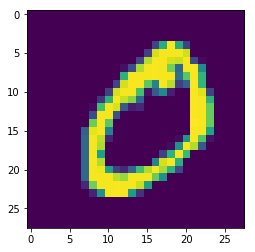

In [2]:
%matplotlib inline
from scipy import io
from sklearn.preprocessing import scale
from keras.utils import to_categorical
import time

datasetDir = "datasets/MNIST/"
datamat = io.loadmat(datasetDir + 'train.mat')
train_images = datamat['train_images']
labels = datamat['train_labels']
train_images = np.transpose(train_images, (2, 0, 1))

plt.imshow(train_images[0])
plt.show()

Data preprocessing for machine learning

1. Vectorize pixels of each image
2. Shuffle samples
3. Standardize each column/feature
4. One-hot encode label

In [43]:
def preprocess(X, Y):
    X = np.reshape(train_images, (train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
    
    # shuffle
    indices = np.random.permutation(Y.shape[0])
    X = X[indices].astype(float)
    Y = Y[indices]
    
    # standardize
    X = scale(X, axis = 0, copy=False)
    
    # One-hot encode
    Y = to_categorical(Y, num_classes = len(np.unique(Y)))
    
    return X, Y

def accuracy(Y, Yhat):
    Y = np.argmax(Y, axis = 1).flatten()
    Yhat = np.argmax(Yhat, axis = 1).flatten()
    return np.mean(Y == Yhat)

X, Y = preprocess(train_images, labels)

For fair assessment of the neural network's performance, we need to set aside a validation dataset that the model has not been trained on. To achieve this, we set aside 10% of samples for validation and the rest for training. Since there are 60,000 samples and only 10 classes, 10% of the entire dataset will likely contain sufficient examples of each class for a relatively comprehensive evaluation.

In [4]:
Xtrain = X[:(9 * len(X) // 10)]
Ytrain = Y[:(9 * len(Y) // 10)]

Xvalidation = X[(9 * len(X) // 10):, :]
Yvalidation = Y[(9 * len(Y) // 10):, :]

Train a neural network with mean squared loss

Iteration 0 - training loss: 67397.6049732501 | training accuracy: 0.19755555555555557Iteration 0 - training loss: 67397.6049732501 | training accuracy: 0.19755555555555557 | validation accuracy: 0.20633333333333334
Iteration 10000 - training loss: 9893.381425274574 | training accuracy: 0.8358888888888889Iteration 10000 - training loss: 9893.381425274574 | training accuracy: 0.8358888888888889 | validation accuracy: 0.838
Iteration 20000 - training loss: 6661.371320973223 | training accuracy: 0.8786481481481482Iteration 20000 - training loss: 6661.371320973223 | training accuracy: 0.8786481481481482 | validation accuracy: 0.8765
Iteration 30000 - training loss: 5426.869559872241 | training accuracy: 0.8967037037037037Iteration 30000 - training loss: 5426.869559872241 | training accuracy: 0.8967037037037037 | validation accuracy: 0.8936666666666667
Iteration 40000 - training loss: 4626.808002383737 | training accuracy: 0.913425925925926Iteration 40000 - training loss: 4626.808002383737 

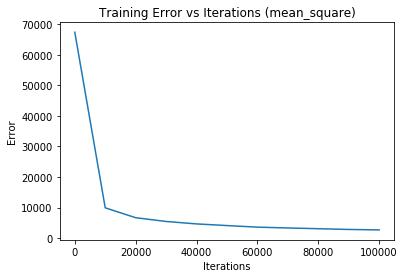

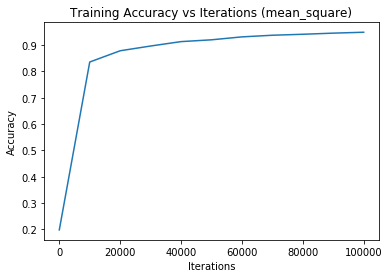

With 2 epochs, the training time is:  3.49


In [39]:
nn_mse = NeuralNetwork(layers = [784, 256, 10], loss = "mean_square", monitor=True, plot=True)

start = time.time()
epochs = 2
nn_mse.train(Xtrain, Ytrain, epochs = epochs, validation = Xvalidation, validation_label = Yvalidation)
end = time.time()
print("With " + str(epochs) + " epochs, the training time is: ", round((end - start)/60, 2), "min")

Report final validation accuracy

In [46]:
YHat = nn_mse.predict(Xvalidation)
val_accuracy = accuracy(Yvalidation, YHat)
print("The validation accuracy is: ", round(val_accuracy, 4)) 

The validation accuracy is:  0.9367


Train a neural network with cross entropy loss

Iteration 0 - training loss: 374481.9258688517 | training accuracy: 0.12933333333333333Iteration 0 - training loss: 374481.9258688517 | training accuracy: 0.12933333333333333 | validation accuracy: 0.129
Iteration 10000 - training loss: 48902.13743335976 | training accuracy: 0.8915925925925926Iteration 10000 - training loss: 48902.13743335976 | training accuracy: 0.8915925925925926 | validation accuracy: 0.8876666666666667
Iteration 20000 - training loss: 36241.568436822956 | training accuracy: 0.9186666666666666Iteration 20000 - training loss: 36241.568436822956 | training accuracy: 0.9186666666666666 | validation accuracy: 0.9088333333333334
Iteration 30000 - training loss: 30034.903024074632 | training accuracy: 0.9300555555555555Iteration 30000 - training loss: 30034.903024074632 | training accuracy: 0.9300555555555555 | validation accuracy: 0.9181666666666667
Iteration 40000 - training loss: 26025.152420963717 | training accuracy: 0.9413333333333334Iteration 40000 - training loss:

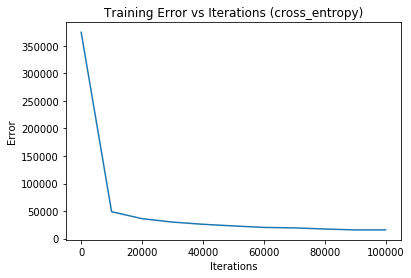

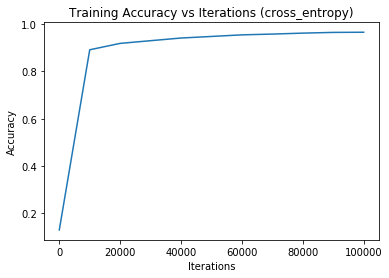

With 2 epochs, the training time is:  3.43 min


In [47]:
nn_cross_entropy = NeuralNetwork([784, 200, 10], loss="cross_entropy", monitor = True, plot=True)
start = time.time()
epochs = 2
nn_cross_entropy .train(Xtrain, Ytrain, epochs, validation = Xvalidation, validation_label = Yvalidation)
end = time.time()
print("With " + str(epochs) + " epochs, the training time is: ", round((end - start)/60, 2), "min") 

Report final validation accuracy

In [49]:
YHat = nn_cross_entropy.predict(Xvalidation)
val_accuracy = accuracy(Yvalidation, YHat)
print("The validation accuracy is: ", round(val_accuracy, 4))

The validation accuracy is:  0.943


# 4. Discussion
Is mean squared error or cross entropy error better for a neural network? Let $g(\cdot)$ be the sigmoid function, and $w, x, b \in \mathbb{R}$.

$$a = g(wx + b) = g(z)$$

Recall that $g'(z) = g(z)(1 - g(z))$. With the loss function

$$\mathcal{L}_{m} = \frac{1}{2}(y - a)^{2}$$

where $y$ denotes true value. The gradient is

$$\frac{d \mathcal{L}_{m}}{d w} = -(y - a)g(z)(1 - g(z))x$$

With this expression, we can tell that whenever $g(z)$ is close to 1 or 0, then learning rate drastically slows down. This is undesirable because learning will be slow even if $y = 1$ and $g(z) \approx 0$.

Now turning to cross entropy, defined as

$$\mathcal{L}_{c} = -y\ln(a) - (1-y)\ln(1-a)$$

Taking the derivative:

$$
\begin{align*}
\frac{\partial \mathcal{L}_{c}}{\partial w} &= -\left(\frac{y}{g(z)} - \frac{1 - y}{1 - g(z)}\right)g'(z)x\\
&= -\left(\frac{y - yg(z) - g(z) + g(z)y}{g(z)(1-g(z))}\right)g'(z)x\\
&= -\left(\frac{y - g(z)}{g(z)(1-g(z))}\right)g(z)(1-g(z))x\\
&= (g(z) - y)x
\end{align*}
$$

We see that the learning rate is proportional to the difference between the true label and the prediction. Furthermore, the learning rate is no longer small if $g(z) \approx 0$ or $g(z) \approx 1$, a problem encountered when using mean squared error. Thus, we can conclude that choosing cross entropy as our loss function improves the performance at a given training iteration.

As a concluding remark, the output and hidden activation functions chosen are by no means optimal for the MNIST digit classification. Since the digits can be thought to have the multinomial distribution, the softmax output activation is typically chosen. For the hidden activation function, ReLU is more commonly used for most non-linear hidden activation functions for being able to avoid the vanishing gradient problem. 